In [2]:
import numpy as np

In [3]:
dg_intensity = np.load("C:/Users/owner/Documents/GitHub/Scalable-Hyp-3D-Imaging/dataset/image_formation/intensity_dg.npy")

In [4]:
dg_intensity

array([[-0.05369972,  0.04875561,  0.10653906,  0.13349999,  0.14132513,
         0.13953814,  0.1355    ,  0.13440883,  0.1393    ,  0.15104605,
         0.16835671,  0.18778983,  0.20458354,  0.215175  ,  0.21803205,
         0.21366453,  0.20461409,  0.19468607,  0.18662497,  0.18134631,
         0.17792658,  0.17360324,  0.1637746 ,  0.142     ,  0.09999969],
       [ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [-0.05369972,  0.04875561,  0.10653906,  0.13349999,  0.14132513,
         0.13953814,  0.1355    ,  0.13440883,  0.1393    ,  0.15104605,
         0.16835671,  0.18778983,  0.20458354,  0.215175  ,  0.21803205,
         0.21366453,  0.20461409,  0.19468607,  0

In [5]:
dg_intensity_21 = dg_intensity[2][3:24]

In [6]:
white_box_p = np.array([0.000045513,
0.00011785,
0.000450827,
0.00192969,
0.00646062,
0.0121806,
0.00988155,
0.00384551,
0.0012909,
0.00158269,
0.00342962,
0.0048454,
0.00536611,
0.00552526,
0.00547096,
0.00517708,
0.00465882,
0.00409307,
0.00335211,
0.00229322,
0.00148828,
0.00177185,
0.0041034,
0.00914754,
0.00845859,
0.00202013,
0.00049117,
0.000153816,
0.0000572871,
])

In [7]:
white_box_p.shape

(29,)

In [8]:
white_box_p_21 = white_box_p[5:-3]

In [9]:
white_box_p_21

array([0.0121806 , 0.00988155, 0.00384551, 0.0012909 , 0.00158269,
       0.00342962, 0.0048454 , 0.00536611, 0.00552526, 0.00547096,
       0.00517708, 0.00465882, 0.00409307, 0.00335211, 0.00229322,
       0.00148828, 0.00177185, 0.0041034 , 0.00914754, 0.00845859,
       0.00202013])

In [10]:
PE = white_box_p_21 * dg_intensity_21

In [11]:
dg_intensity_21

array([0.13349999, 0.14132513, 0.13953814, 0.1355    , 0.13440883,
       0.1393    , 0.15104605, 0.16835671, 0.18778983, 0.20458354,
       0.215175  , 0.21803205, 0.21366453, 0.20461409, 0.19468607,
       0.18662497, 0.18134631, 0.17792658, 0.17360324, 0.1637746 ,
       0.142     ])

In [12]:
import cv2

In [13]:
# img = cv2.imread("C:/Users/owner/Documents/GitHub/Scalable-Hyp-3D-Imaging/calibration/dispersion_20ms_crf_experiment.png")
img = cv2.imread("C:/Users/owner/Documents/GitHub/Scalable-Hyp-3D-Imaging/calibration/capture_0000.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [14]:
img.shape

(768, 1024, 3)

In [15]:
img[257,462]

array([ 36,  39, 250], dtype=uint8)

In [16]:
crf = np.zeros(shape=(21, 3))

In [17]:
PE.shape

(21,)

In [18]:
nm_idx_x = np.array([462,454,446,438,430,419,411,403,395,387,378,370,362,354,346,337,329,321,313,305,297])

In [19]:
nm_idx_x.shape

(21,)

In [20]:
import torch
wvl = torch.linspace(450, 650, 21)
color = np.array(['R','G','B'])

c:\Users\owner\anaconda3\envs\hyper3d\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [21]:
wvl

tensor([450., 460., 470., 480., 490., 500., 510., 520., 530., 540., 550., 560.,
        570., 580., 590., 600., 610., 620., 630., 640., 650.])

In [22]:
max, min = img[257,297:462].max(), img[257,297:462].min()
max, min

(255, 31)

In [23]:
for i in range(3):
    for j in range(21):
        # print(f'{wvl[j]}nm {color[i]}', img[257,nm_idx_x[j],i])
        crf[j, i] = (img[257,nm_idx_x[j],i] - min)/(max-min) * PE[j]

In [24]:
crf.shape

(21, 3)

In [25]:
import matplotlib.pyplot as plt

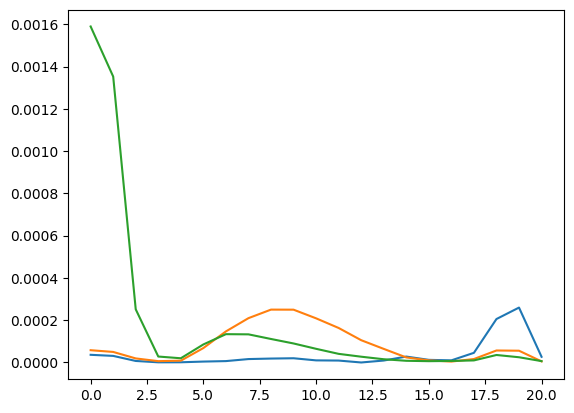

In [26]:
plt.plot(crf)

In [27]:
cam_crf = np.zeros(shape = (29, 3))

In [28]:
cam_crf[:,0] = np.array([0.09075,
0.07031994,
0.05344998,
0.04014003,
0.03041814,
0.0249,
0.023837505,
0.02523333,
0.0242052,
0.020964735,
0.02505,
0.04036296,
0.059691255,
0.06540468,
0.056858535,
0.037499865,
0.008739,
0.02753913,
0.23314449,
0.61937205,
0.91095,
0.99526719,
0.9355293,
0.8862372,
0.8535294,
0.81795,
0.77154,
0.69274713,
0.528888705])


In [29]:
cam_crf[:,1] = np.array([0.0704,
0.06122411,
0.05372275,
0.04789588,
0.04419689,
0.0526,
0.07718548,
0.13260333,
0.25466397,
0.440288,
0.5859,
0.64912814,
0.6522202,
0.6495597,
0.6434468,
0.6300999,
0.60797226,
0.5752577,
0.5275419,
0.46469188,
0.3882,
0.2986767,
0.20837703,
0.14725776,
0.11603077,
0.1004,
0.09451748,
0.09184141,
0.07638084,
])

In [30]:
cam_crf[:, 2] = np.array([0.2429,
0.3182906,
0.3851603,
0.44350952,
0.49302822,
0.5269,
0.5423363,
0.53673637,
0.5037431,
0.4436149,
0.3684,
0.28302726,
0.19699267,
0.1335088,
0.09310442,
0.06419986,
0.04205811,
0.0267778,
0.01860077,
0.01727041,
0.0169,
0.01508131,
0.01327676,
0.01506111,
0.02047346,
0.0268,
0.03293049,
0.03646783,
0.03155245,
])

In [31]:
np.save('crf_cam_new_v2.npy', cam_crf)